In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [62]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5) # 3 -> Number of input channels 6 -> num filters 3-> filter size 3X3
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) #Fully connected Y =Wx+b
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    #Define Forward prop(backward is automatically taken care of by autograd)
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2)) #Can also be just 2 if its square pooling
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = x.view(-1, 16 * 5 * 5) #view is reshape as seen before
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        

In [63]:
net = Net()
print(net)
params = list(net.parameters())
# print(params)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [32]:
# input = torch.randn(1, 1, 32, 32)
# target = torch.randn(10)  # a dummy target
# target = target.view(1, -1)  # make it the same shape as output

# #Define one step(Same basic structure every where)
# criterion = nn.MSELoss()
# optimizer = optim.SGD(params, lr=0.01)
# optimizer.zero_grad() #Zero the gradient before another step
# output = net(input) #forward prop
# loss = criterion(output,target) #loss computation
# loss.backward() #gradient computation for backprop
# optimizer.step() #update

C:\Users\vgpru\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [64]:
'''Data pre processing CIFAR10
Directly taken from Tutorial
'''

#Normalize to -1 to 1
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


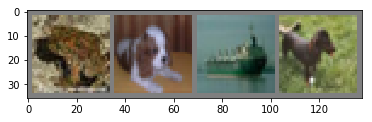

 frog   dog  ship   dog


In [43]:
'''Showing the images
Again taken directly from tutorial'''
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [67]:
'''Training with CrossEntropy and Adam optimizer'''

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.033
[1,  4000] loss: 1.021
[1,  6000] loss: 1.052
[1,  8000] loss: 1.049
[1, 10000] loss: 1.044
[1, 12000] loss: 1.067
[2,  2000] loss: 0.977
[2,  4000] loss: 1.003
[2,  6000] loss: 0.998
[2,  8000] loss: 1.017
[2, 10000] loss: 1.029
[2, 12000] loss: 1.029
Finished Training


In [66]:
#Testing part
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %
